#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [2]:
import mysql.connector
import pandas as pd
from mysql.connector.connection import MySQLConnection

con = mysql.connector.connect(user='root', password='Qazxswedc123',
                              host='127.0.0.1',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [10]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

df = pd.read_sql(sql, con)

print(df)

    hire_year  employee_count
0        1985           35316
1        1986           36150
2        1987           33501
3        1988           31436
4        1989           28394
5        1990           25610
6        1991           22568
7        1992           20402
8        1993           17772
9        1994           14835
10       1995           12115
11       1996            9574
12       1997            6669
13       1998            4155
14       1999            1514
15       2000              13


C:\Users\zubak\AppData\Local\Temp\ipykernel_7992\2464153230.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

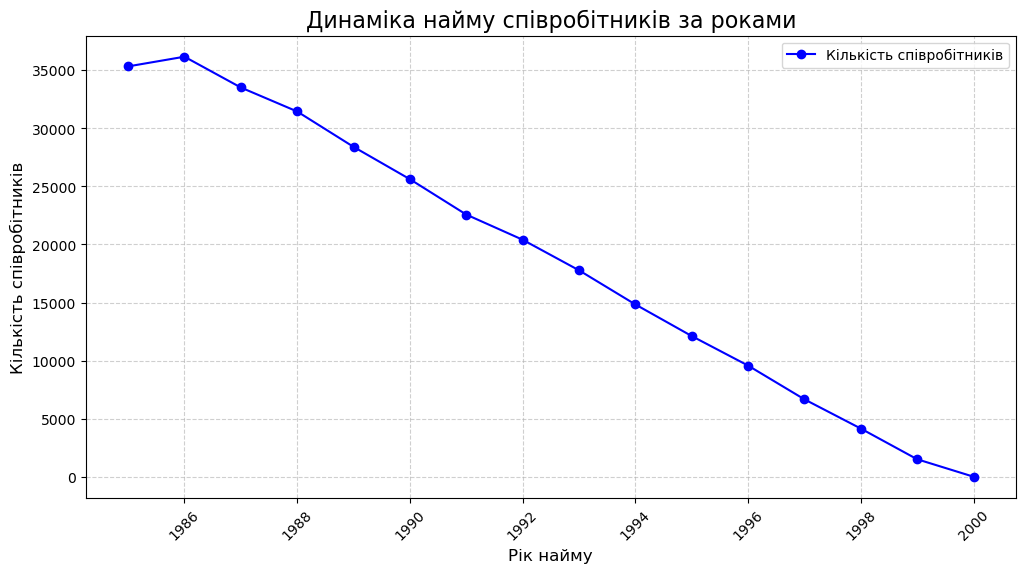

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['hire_year'], df['employee_count'], marker='o', color='b', label='Кількість співробітників')

plt.title('Динаміка найму співробітників за роками', fontsize=16)
plt.xlabel('Рік найму', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=45)

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [17]:
sql = """
SELECT 
    t.emp_no, t.from_date, t.to_date,
    TIMESTAMPDIFF(YEAR, t.from_date, t.to_date) AS years_on_position
FROM 
    titles t
WHERE 
    t.title = 'Engineer' 
    AND t.to_date != '9999-01-01';
"""

df_years = pd.read_sql(sql, con)

print(df_years)

C:\Users\zubak\AppData\Local\Temp\ipykernel_7992\1729717775.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql, con)


       emp_no   from_date     to_date  years_on_position
0       10004  1986-12-01  1995-12-01                  9
1       10009  1990-02-18  1995-02-18                  5
2       10012  1992-12-18  2000-12-18                  8
3       10018  1987-04-03  1995-04-03                  8
4       10026  1995-03-20  2001-03-19                  5
...       ...         ...         ...                ...
84015  499972  1989-11-23  1998-11-23                  9
84016  499984  1989-07-30  1994-07-30                  5
84017  499994  1993-02-22  1993-10-27                  0
84018  499996  1996-05-13  2002-05-13                  6
84019  499997  1987-08-30  1992-08-29                  4

[84020 rows x 4 columns]


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

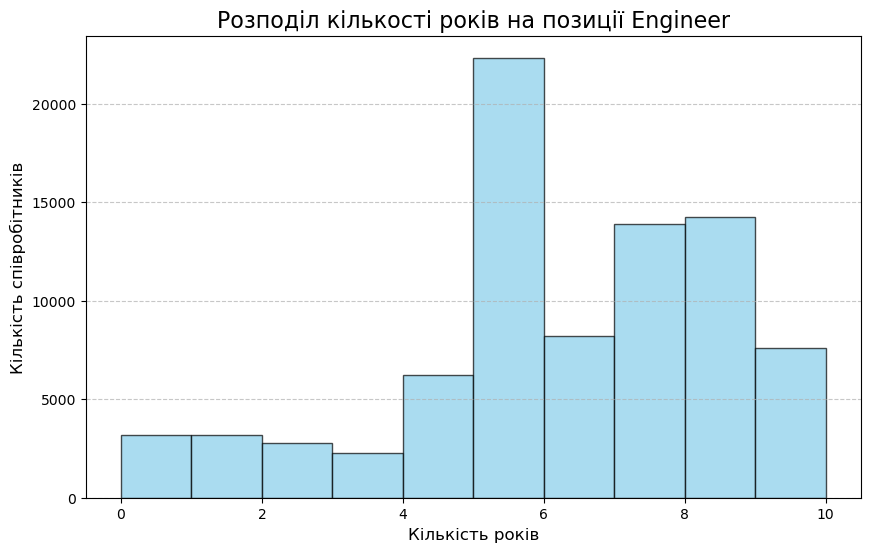

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df_years['years_on_position'], bins=range(0, df_years['years_on_position'].max() + 2), color='skyblue', edgecolor='black', alpha=0.7)

# Додавання підписів
plt.title('Розподіл кількості років на позиції Engineer', fontsize=16)
plt.xlabel('Кількість років', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)

# Показати графік
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [19]:
con.close()